In [1]:
from ase.io.espresso import read_espresso_out, read_espresso_in
import os

In [2]:
path2scf = "/Users/y1u0d2/desktop/Lab/data/qe_data/SiO2/mp-546794/result/scf978"
with open(os.path.join(path2scf, 'scf.in')) as f:
    atoms = read_espresso_in(f)

In [3]:
atoms.positions

array([[0.03582946, 5.64867954, 0.04671969],
       [2.93918713, 5.64176277, 6.24585306],
       [2.94323978, 2.88468382, 4.14129679],
       [0.03913646, 2.79589878, 2.05398622],
       [3.39445905, 4.10597914, 5.09452827],
       [4.20343025, 0.47462061, 7.32919998],
       [1.34916477, 5.00910018, 7.41225398],
       [2.26536144, 1.41953425, 5.1161804 ],
       [0.50841118, 1.42266441, 0.96076576],
       [1.44176345, 3.33367975, 3.11033029],
       [4.20058683, 2.41525767, 3.13039743],
       [5.03467801, 4.30332232, 0.95572727]])

In [4]:
# read output
with open(os.path.join(path2scf, 'scf.out')) as f:
    data = read_espresso_out(f, index=slice(None))
    obj = next(data)

In [5]:
obj.get_potential_energy()

-7086.139407410536

In [6]:
obj.get_forces()

array([[-0.24081826, -0.86915885, -0.81614373],
       [-0.92244625,  0.59536465, -0.15524218],
       [-2.22851241, -2.22754259, -0.97579947],
       [-0.03138983,  0.85163318,  0.57933176],
       [-0.95244717,  2.85772691,  2.1517876 ],
       [-0.08004718, -1.50403596, -0.65451185],
       [ 0.48266471,  2.14801374, -0.45311245],
       [ 2.44394823, -0.79502803,  0.74493677],
       [-1.7152364 ,  0.48503758,  0.77272706],
       [-0.76589692, -1.65554335, -0.75437735],
       [ 1.76957923,  0.80205152, -1.31793617],
       [ 2.24060199, -0.6885188 ,  0.87834026]])

In [7]:
obj.get_potential_energy()

-7086.139407410536

In [8]:
import numpy as np
cell_matlix = np.array([vec for vec in obj.cell])

In [9]:
obj.get_global_number_of_atoms()

12

In [10]:
from mlptools.io.read import read_from_format

path2scf = "/Users/y1u0d2/desktop/Lab/data/qe_data/SiO2/mp-546794/result/scf978"
mlpatoms = read_from_format(path2scf, format='espresso-in')

/Users/y1u0d2/opt/anaconda3/envs/mlp/lib/python3.11/site-packages/ovito/_extensions/averaging.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


In [11]:
mlpatoms.get_ase_atoms()

Atoms(symbols='Si4O8', pbc=True, cell=[5.658652758795757, 5.658652758795757, 8.350321092530411], calculator=SinglePointDFTCalculator(...))

In [12]:
from mlptools.io.parser import PWscfParser

parser = PWscfParser(path2scf)

In [13]:
parser.ase_atoms

Atoms(symbols='Si4O8', pbc=True, cell=[5.658652758795757, 5.658652758795757, 8.350321092530411], calculator=SinglePointDFTCalculator(...))

In [14]:
path2target = "/Users/y1u0d2/Downloads/SiO2/result/SiO2_1"

In [16]:
mlpatoms = read_from_format(path2target, format='espresso-in')

AssertionError: 

In [21]:
# read from input
with open(os.path.join(path2target, 'scf.in')) as f:
    ase_atoms = read_espresso_in(f)

In [22]:
from ovito.modifiers import CoordinationAnalysisModifier
from ovito.pipeline import StaticSource, Pipeline
from ovito.io.ase import ase_to_ovito

pipeline = Pipeline(source = StaticSource(data=ase_to_ovito(ase_atoms)))
modifier = CoordinationAnalysisModifier(cutoff=6, number_of_bins=100, partial=True)
pipeline.modifiers.append(modifier)
rdf_table = pipeline.compute().tables['coordination-rdf']

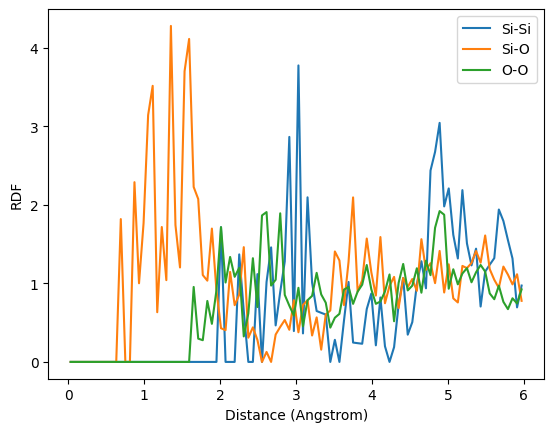

In [41]:
import matplotlib.pyplot as plt
rdf_component_name = rdf_table.y.component_names

fig, ax = plt.subplots()
for i, name in enumerate(rdf_component_name):
    ax.plot(rdf_table.xy()[:, 0], rdf_table.y[:, i], label=name)

ax.set_xlabel('Distance (Angstrom)')
ax.set_ylabel('RDF')
ax.legend()

array([[0.03      , 0.        , 0.        , 0.        ],
       [0.09      , 0.        , 0.        , 0.        ],
       [0.15      , 0.        , 0.        , 0.        ],
       [0.21      , 0.        , 0.        , 0.        ],
       [0.27      , 0.        , 0.        , 0.        ],
       [0.33      , 0.        , 0.        , 0.        ],
       [0.39      , 0.        , 0.        , 0.        ],
       [0.45      , 0.        , 0.        , 0.        ],
       [0.51      , 0.        , 0.        , 0.        ],
       [0.57      , 0.        , 0.        , 0.        ],
       [0.63      , 0.        , 0.        , 0.        ],
       [0.69      , 0.        , 1.81857033, 0.        ],
       [0.75      , 0.        , 0.        , 0.        ],
       [0.81      , 0.        , 0.        , 0.        ],
       [0.87      , 0.        , 2.28834365, 0.        ],
       [0.93      , 0.        , 1.00134871, 0.        ],
       [0.99      , 0.        , 1.76737435, 0.        ],
       [1.05      , 0.        ,